#### Line plot

In [1]:
# create a line plot
import pandas as pd
from matplotlib import pyplot as plt

In [77]:
series = pd.read_csv('daily-minimum-temperatures.csv')
series

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [78]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [86]:
series = pd.read_csv('daily-minimum-temperatures.csv',
                     parse_dates = ['Date'])
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [101]:
series = pd.read_csv('daily-minimum-temperatures.csv',
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [102]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [103]:
series.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

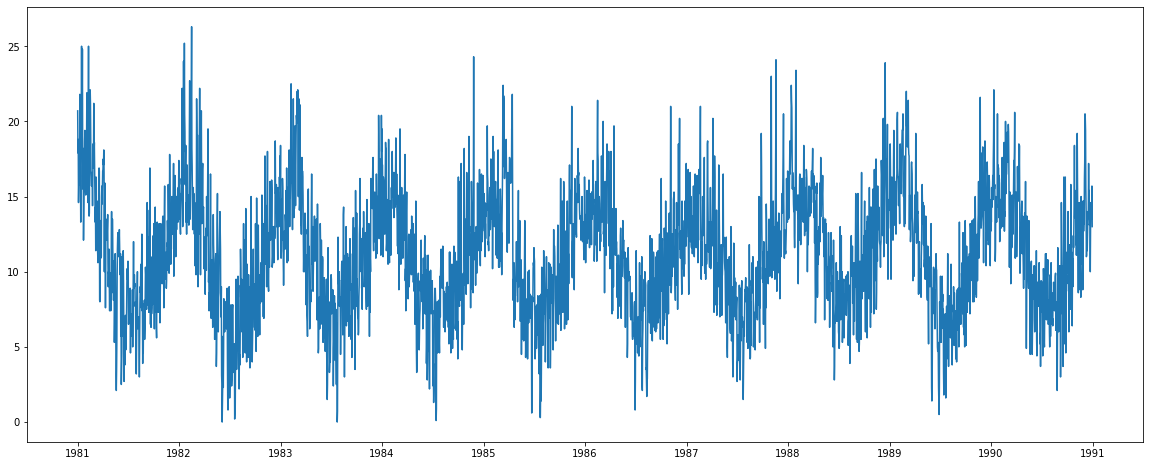

In [24]:
plt.figure(figsize = (20,8))
plt.plot(series)
#series.plot()

#### Histogram and Density Plots

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

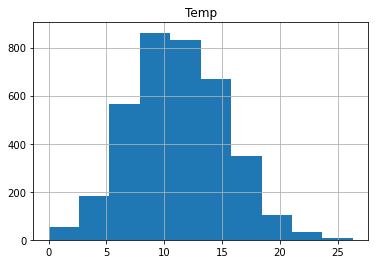

In [32]:
# create a histogram plot
series.hist()

<AxesSubplot:ylabel='Density'>

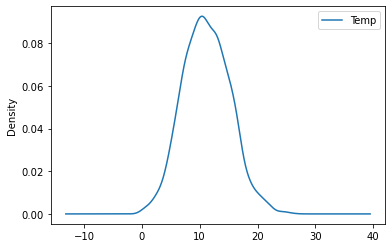

In [35]:
# create a density plot
series.plot(kind='kde')

#### Box and Whisker Plots by Interval

In [36]:
type(pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True,squeeze=False))

C:\Users\Admin\AppData\Local\Temp\ipykernel_1168\3851200317.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  type(pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True,squeeze=False))


pandas.core.frame.DataFrame

In [37]:
type(pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True,squeeze=True))

C:\Users\Admin\AppData\Local\Temp\ipykernel_1168\677578881.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  type(pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True,squeeze=True))


pandas.core.series.Series

In [39]:
# create a boxplot of yearly data

series = pd.read_csv('daily-minimum-temperatures.csv',
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  squeeze=True)

series

C:\Users\Admin\AppData\Local\Temp\ipykernel_1168\2153507742.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-minimum-temperatures.csv',


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [40]:
type(series)

pandas.core.series.Series

In [41]:
groups = series.groupby(pd.Grouper(freq='A'))
groups

In [50]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


<AxesSubplot:>

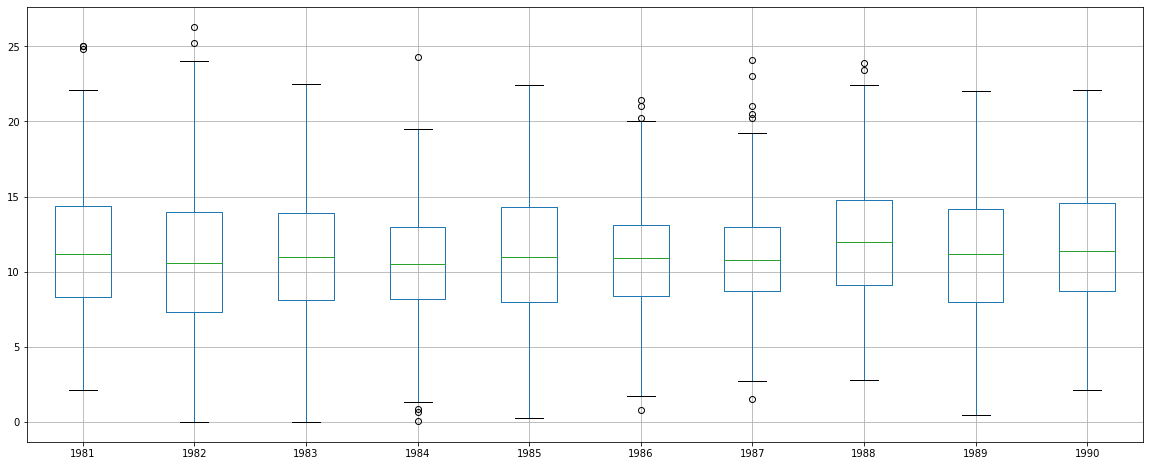

In [51]:
plt.figure(figsize = (20,8))
years.boxplot()

#### Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

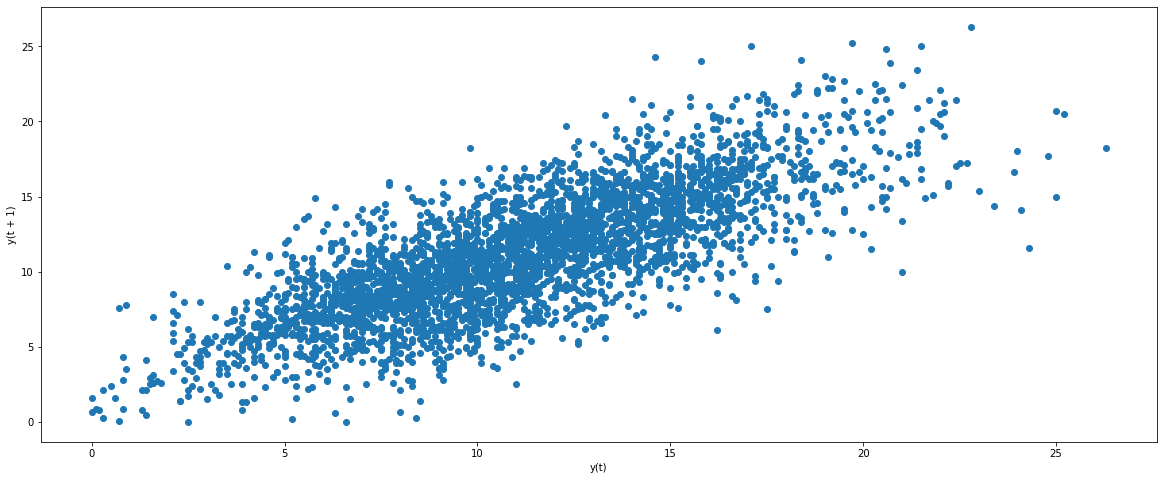

In [54]:
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(series)

<Figure size 2880x720 with 0 Axes>

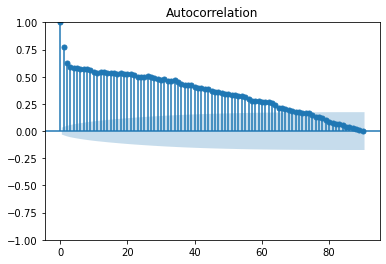

In [64]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(series, lags=90)
plt.show()